# Return Maps of Filament Dynamics

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import pyfilaments.analysisutils as analysis
from pyfilaments._def_analysis import *
import pandas as pd
import h5py

from joblib import Parallel, delayed
import multiprocessing
%matplotlib notebook
plt.close('all')
# Create a folder for storing Publication figures
publication_figures = '/home/deepak/Dropbox/LacryModeling/ActiveFilamentsManuscript/Figures/Figure4'

import _figure_parameters

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

## Load the simulation Return Map data

In [17]:

# processed_data = '/home/deepak/Dropbox/LacryModeling/processed_data/ReturnMap_BaseTipAngle'

processed_data = '/home/deepak/Dropbox/LacryModeling/processed_data/ReturnMap_BaseTipAngle/activityTime_sweep'

analysis_type = 'ReturnMap_BaseTipAngle'
# parameter = 'potDipole strength'
# parameter_values_to_plot = [1.526, 1.654, 2.29, 2.744]


parameter = 'activity timescale'
parameter_values_to_plot = [650, 750, 900]


In [19]:
# Collate the dataFrames
df_ensemble = pd.DataFrame({})


for root, dirs, files in os.walk(processed_data):
       
    for file in files:
            
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_metadata = pd.read_csv(os.path.join(root, 'metadata.csv'))
            
            parameter_value = df_metadata[parameter][0]
            
            if(np.any(abs(parameter_value - parameter_values_to_plot)<=0.1)):

                base_tip_0 = np.array(df['Base-Tip angle'])[:-1]
                base_tip_1 = np.array(df['Base-Tip angle'][1:])



                df_ensemble = df_ensemble.append(pd.DataFrame({'Base-Tip angle (n)':base_tip_0, 
                                                           'Base-Tip angle (n+1)':base_tip_1, 
                                                           parameter:np.repeat(parameter_value, len(base_tip_0))}))
            
        

In [20]:
parameter_values = np.unique(df_ensemble[parameter])

print(parameter_values)

[650 750 900]


## Load Single-cycle Return map Data

In [21]:
# Load the single-cycle prediction data
analysis_type = 'buckling_escape_angles'
# single_cycle_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL'

# Activity time-sweep
single_cycle_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/ActivityTime_Sweep_FINAL'

df_ensemble_predicted = pd.DataFrame({})

for root, dirs, files in os.walk(single_cycle_folder):
    
    for file in files:
        if(analysis_type in file and file.endswith('.csv')):
            print(file)

            df = pd.read_csv(os.path.join(root, file))
            
            df_ensemble_predicted = df_ensemble_predicted.append(df)
            
            
            
            
            
            

            

        


buckling_escape_angles_800_1.5.csv
buckling_escape_angles_850_1.5.csv
buckling_escape_angles_300_1.5.csv
buckling_escape_angles_450_1.5.csv
buckling_escape_angles_500_1.5.csv
buckling_escape_angles_650_1.5.csv
buckling_escape_angles_200_1.5.csv
buckling_escape_angles_700_1.5.csv
buckling_escape_angles_900_1.5.csv
buckling_escape_angles_400_1.5.csv
buckling_escape_angles_550_1.5.csv
buckling_escape_angles_350_1.5.csv
buckling_escape_angles_250_1.5.csv
buckling_escape_angles_750_1.5.csv
buckling_escape_angles_950_1.5.csv
buckling_escape_angles_600_1.5.csv


In [15]:
df_ensemble_predicted

,Unnamed: 0,Initial angle (rad),Final angle (rad),potDipole strength,activity timescale
0,0,-3.388674e-08,-0.004101,1.5,800
1,1,5.920090e-03,-0.354653,1.5,800
2,2,1.184020e-02,-0.441287,1.5,800
3,3,1.776027e-02,-0.495249,1.5,800
4,4,2.368036e-02,-0.536014,1.5,800
...,...,...,...,...,...
195,195,1.154417e+00,0.280290,1.5,600
196,196,1.160337e+00,0.285508,1.5,600
197,197,1.166257e+00,0.290671,1.5,600
198,198,1.172177e+00,0.295986,1.5,600


[650 750 900]
650


<IPython.core.display.Javascript object>


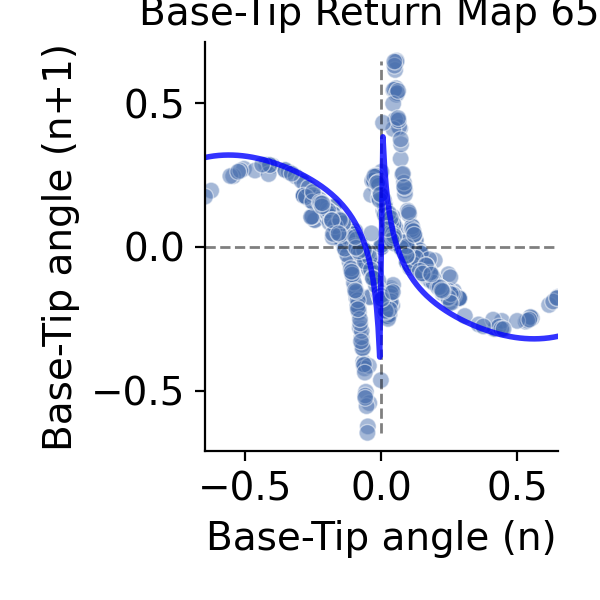

750


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<IPython.core.display.Javascript object>


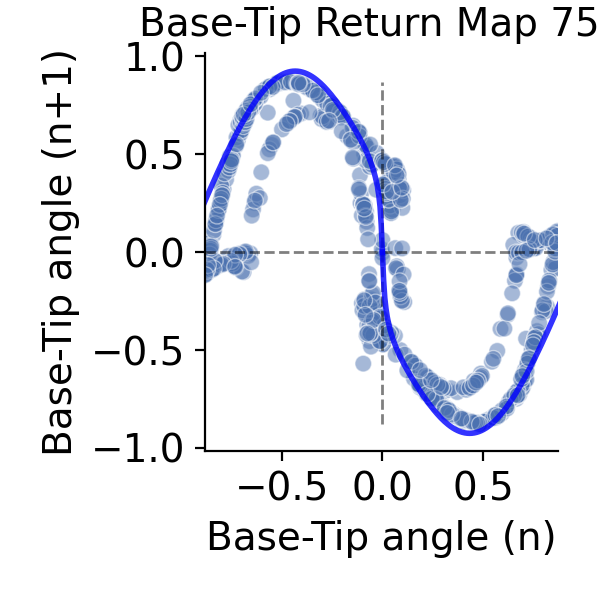

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


900


<IPython.core.display.Javascript object>


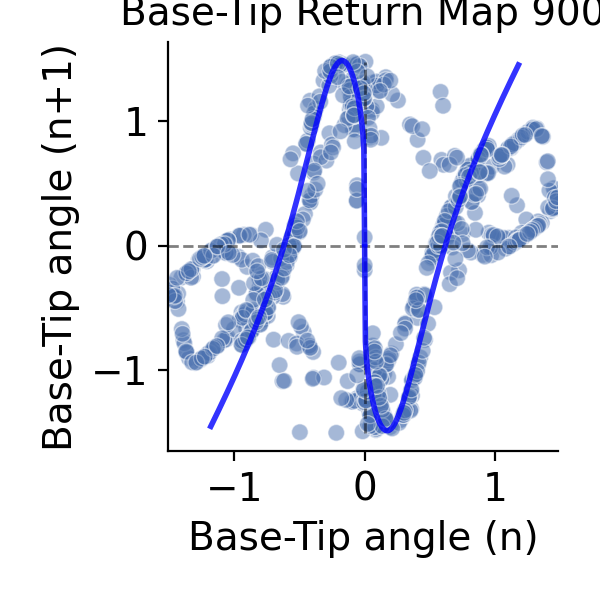

/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
# Plot each activity strength separately
save = True
df_ss_prediction = pd.DataFrame({})
parameter_array = np.unique(df_ensemble[parameter])

print(parameter_array)

for parameter_value in parameter_array:
    
    print(parameter_value)
    df_full_sim = df_ensemble.loc[df_ensemble[parameter]==parameter_value]
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
  
    
    title = 'Base-Tip Return Map {}'.format(np.round(parameter_value,2))
    plt.figure(figsize=(3,3))
    
    # Plot the full-sim data
    sns.scatterplot(data = df_full_sim,x = 'Base-Tip angle (n)', y = 'Base-Tip angle (n+1)', hue = parameter, 
                    style = parameter, palette = 'deep', alpha = 0.5, legend = False)
    
    angle_min = np.min(df_full_sim['Base-Tip angle (n)'])
    angle_max = np.max(df_full_sim['Base-Tip angle (n)'])
        
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color = 'b', alpha = 0.8, linewidth = 2)

    
    

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

#     ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
#     ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
    plt.xlim([angle_min, angle_max])
#     plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    sns.despine(top=True, right = True)
    
    if(save):

        plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
        plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)
    plt.show()

## Plot the single-cycle predictions Return maps and Fixed points for particular activity strengths.

### Load the Fixed points data

In [16]:
analysis_type = 'FixedPoints'

# Activity strength sweep
# folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/activity_strength_sweep_FINAL/FixedPointAnalysis'

# Activity time sweep
folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FollowerForce_BucklingDynamics_Simulations/ActivityTime_Sweep_FINAL/FixedPointAnalysis'

df_fixed_pts = pd.DataFrame({})

for root, dirs, files in os.walk(folder):
    
    for file in files:
        if(analysis_type in file and file.endswith('.csv')):
            
            df = pd.read_csv(os.path.join(root, file))
            
            df_fixed_pts = df_fixed_pts.append(df)

In [14]:
df_fixed_pts

,Unnamed: 0,Fixed point,Slope,type,activity timescale,potDipole strength
0,0,0.000000,0.865343,Positive,250,1.5
1,0,0.379267,1.037462,Positive,250,1.5
0,0,0.000000,-92.809658,Positive,850,1.5
1,0,1.166079,2.244737,Positive,850,1.5
2,0,0.571316,3.560876,Negative,850,1.5
0,0,0.000000,87.392695,Positive,600,1.5
1,0,0.129015,-1.399775,Positive,600,1.5
0,0,0.000000,-88.714061,Positive,900,1.5
1,0,0.956357,2.390041,Positive,900,1.5
2,0,0.489077,4.068377,Negative,900,1.5


<IPython.core.display.Javascript object>


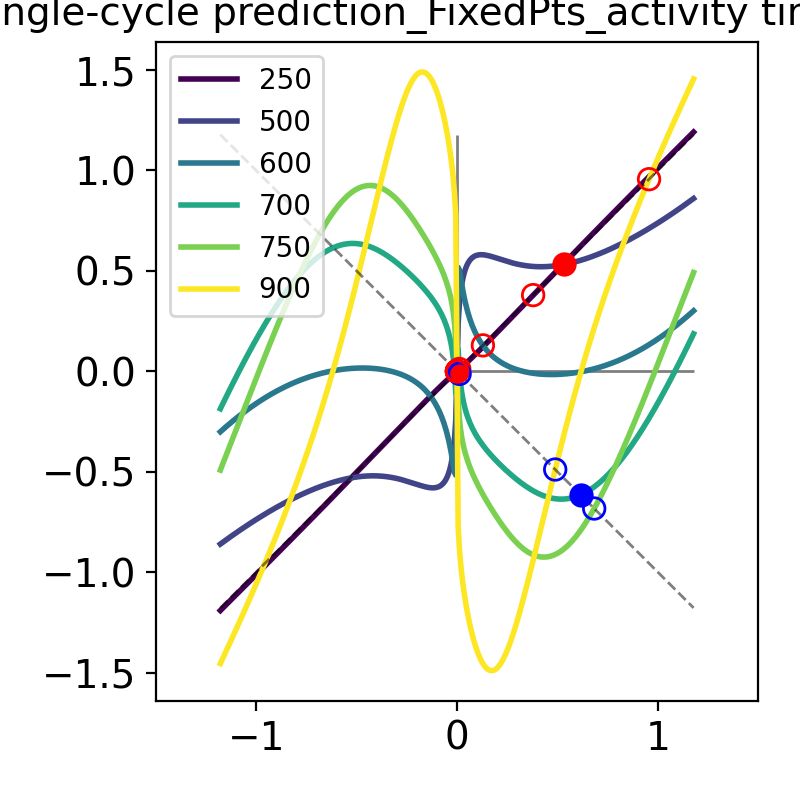

250
500
600
700
750
900


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [31]:
# Activity strength
# parameter_values_to_plot = [0.756, 1.141, 1.526, 2.487, 2.744]

# Activity time sweep
parameter_values_to_plot = [250, 500, 600, 700, 750, 900]

save = True

cmap = plt.cm.get_cmap(plt.cm.viridis, 255)
# cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)

colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction_FixedPts_{}'.format(parameter)
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  
             color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  
             color =  colors[ii], alpha = 1, linewidth = 2)

    
    
    # Plot the fixed points
    df_fixed_pts_parameter = df_fixed_pts.loc[np.round(df_fixed_pts[parameter],3)==np.round(parameter_value,3)]
    
    for jj in range(len(df_fixed_pts_parameter)):
        
        fixed_pt = df_fixed_pts_parameter['Fixed point'][jj]
        stability = df_fixed_pts_parameter['stability'][jj]
        fixed_pt_type = df_fixed_pts_parameter['type'][jj]
        
        if(fixed_pt_type=='Positive'):
            y_fixed_pt = fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='r', edgecolors='r', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='r', zorder = 10)
        else:
            y_fixed_pt = -fixed_pt
            if(stability == 'linearly stable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o',facecolors='b', edgecolors='b', zorder = 10)
            elif(stability == 'unstable'):
                plt.scatter(fixed_pt, y_fixed_pt, 60, marker = 'o', facecolors='none', edgecolors='b', zorder = 10)
            
    angle_min = np.min(df_ss_prediction['Initial angle (rad)'])
    angle_max = np.max(df_ss_prediction['Initial angle (rad)'])

diag_line_x = np.linspace(-angle_max, angle_max, 20)
diag_line_y = diag_line_x
diag_line_y_neg = -diag_line_x

ax2 = plt.plot(diag_line_x, diag_line_y, 'k--', linewidth = 1, alpha =0.5)
ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k--', linewidth = 1, alpha =0.5)

ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '-',linewidth = 1, alpha =0.5, )
ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '-', linewidth = 1, alpha =0.5)

plt.axis('equal')
plt.tight_layout()
plt.title(title)
plt.legend()
if(save):

    plt.savefig(os.path.join(publication_figures, title + '.png'), dpi = 300)
    plt.savefig(os.path.join(publication_figures, title + '.svg'), dpi = 300)

## Plots near high activity values

<IPython.core.display.Javascript object>


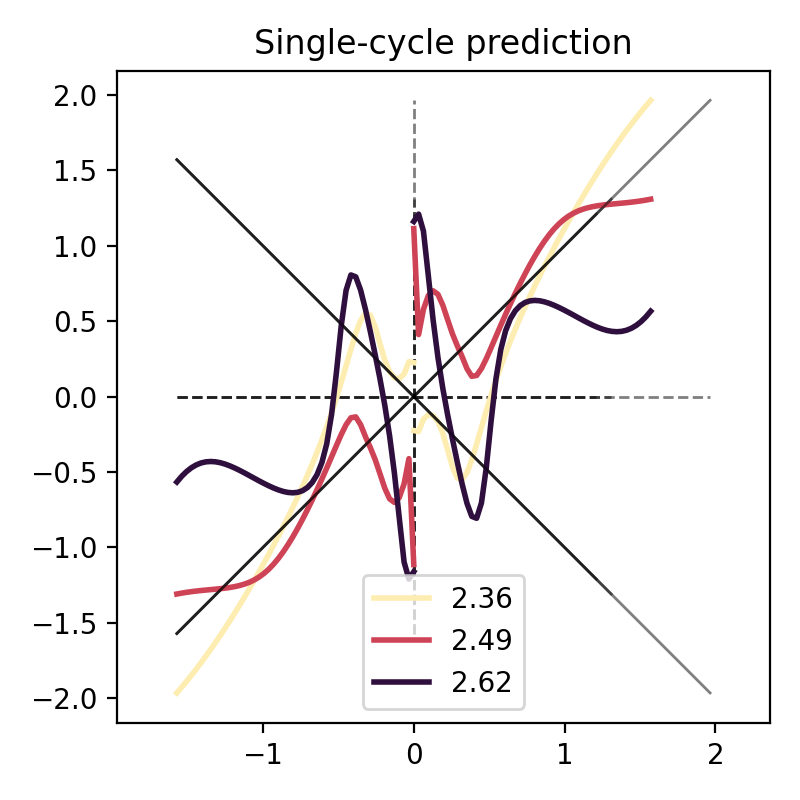

2.359
2.487
2.615


/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/deepak/anaconda3/envs/stokes_py3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [76]:
parameter_values_to_plot = [2.359, 2.487, 2.615]

cmap = plt.cm.get_cmap(ACTIVITY_STRENGTH_CMAP, 255)
colors = [cmap(ii) for ii in np.linspace(0,1,len(parameter_values_to_plot))]

title = 'Single-cycle prediction'
plt.figure(figsize=(4,4))

for ii, parameter_value in enumerate(parameter_values_to_plot):
    
    print(parameter_value)
    
    df_ss_prediction = df_ensemble_predicted.loc[np.round(df_ensemble_predicted[parameter],3)==np.round(parameter_value,3)]
    
    df_ss_prediction['-Initial angle (rad)'] = -df_ss_prediction['Initial angle (rad)']
    df_ss_prediction['-Final angle (rad)'] = -df_ss_prediction['Final angle (rad)']
    
    # Plot the single-cycle data
    plt.plot(df_ss_prediction['Initial angle (rad)'], df_ss_prediction['Final angle (rad)'],  color = colors[ii], alpha = 1, linewidth = 2, label = np.round(parameter_value,2))
    plt.plot(df_ss_prediction['-Initial angle (rad)'], df_ss_prediction['-Final angle (rad)'],  color =  colors[ii], alpha = 1, linewidth = 2)

    
    angle_min = np.min(df_ss_prediction['-Initial angle (rad)'])
    angle_max = np.max(df_ss_prediction['Final angle (rad)'])

    diag_line_x = np.linspace(angle_min, angle_max, 20)
    diag_line_y = diag_line_x
    diag_line_y_neg = -diag_line_x

    ax2 = plt.plot(diag_line_x, diag_line_y, 'k-', linewidth = 1, alpha =0.5)
    ax2 = plt.plot(diag_line_x, diag_line_y_neg, 'k-', linewidth = 1, alpha =0.5)

    ax2 = plt.hlines(0, angle_min, angle_max, color = 'k', linestyle = '--',linewidth = 1, alpha =0.5)
    ax2 = plt.vlines(0, angle_min, angle_max, color = 'k', linestyle = '--', linewidth = 1, alpha =0.5)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.title(title)
    plt.legend()